In [21]:
import google.generativeai as genai
import os
import seaborn as sns
import pandas as pd

# **Auth**

In [2]:
import os
if 'COLAB_RELEASE_TAG' in os.environ:
  from google.colab import userdata
  import pathlib
  pathlib.Path('client_secret.json').write_text(userdata.get('CLIENT_SECRET'))

  # Use `--no-browser` in colab
  !gcloud auth application-default login --no-browser --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'
else:
  !gcloud auth application-default login --client-id-file client_secret.json --scopes='https://www.googleapis.com/auth/cloud-platform,https://www.googleapis.com/auth/generative-language.tuning'

You are authorizing client libraries without access to a web browser. Please run the following command on a machine with a web browser and copy its output back here. Make sure the installed gcloud version is 372.0.0 or newer.

gcloud auth application-default login --remote-bootstrap="https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=883975373451-kjbcln3n4c0d60h0ro4qhcp0kja2pn87.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fgenerative-language.tuning&state=eq70bCpEsmjtWj9Y5Jmjh17g8V22Vv&access_type=offline&code_challenge=fqc_OtSNjh4yonf-TUdx8nmfOK6iQ3UJNYkuUZyMHeM&code_challenge_method=S256&token_usage=remote"


Enter the output of the above command: https://localhost:8085/?state=eq70bCpEsmjtWj9Y5Jmjh17g8V22Vv&code=4/0AVG7fiQiff1Yf2UdJw1eSZHDjcgmfWgRE3gHyXeYKtXuL6WRM0fLZwEaVK8aQqi7JK4Y4g&scope=https://www.googleapis.com/auth/cloud-platform%20https://www.googleapis.com/auth/generati

In [36]:
import google.generativeai as genai
for i, m in zip(range(4), genai.list_tuned_models()):
  print(m.name)


tunedModels/domain4cookin
tunedModels/domain4fashiont
tunedModels/domain4gymt


In [23]:
import google.generativeai as genai
for i, m in zip(range(4), genai.list_tuned_models()):
  print(m.name)


tunedModels/domain4cookin
tunedModels/domain4fashiont
tunedModels/domain4gymt


In [15]:
### genai.delete_tuned_model("tunedModels/domain4fashion")

# **Dominio - Cocina**

## **Ajuste de Modelo**

In [37]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][0]
base_model

Model(name='models/gemini-1.0-pro-001',
      base_model_id='',
      version='001',
      display_name='Gemini 1.0 Pro 001 (Tuning)',
      description=('The best model for scaling across a wide range of tasks. This is a stable '
                   'model that supports tuning.'),
      input_token_limit=30720,
      output_token_limit=2048,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=0.9,
      max_temperature=None,
      top_p=1.0,
      top_k=None)

## Datos de entrenamiento

In [38]:
training_cooking = [
    {
        "text_input": "pollo, cebolla, ajo, pimiento, tomate",
        "output": "Paso 1: Corta el pollo en trozos pequeños. Paso 2: Sofríe la cebolla, el ajo y el pimiento en una sartén con aceite de oliva. Paso 3: Añade el pollo y cocina hasta que esté dorado. Paso 4: Agrega el tomate picado y deja cocinar a fuego lento durante 20 minutos. Paso 5: Sirve acompañado de arroz."
    },
    {
        "text_input": "pasta, calabacín, ajo, aceite de oliva, queso parmesano",
        "output": "Paso 1: Cocina la pasta en agua hirviendo con sal. Paso 2: Corta el calabacín en rodajas finas y sofríelo con ajo en aceite de oliva. Paso 3: Escurre la pasta y mezcla con el calabacín. Paso 4: Espolvorea queso parmesano por encima y sirve."
    },
    {
        "text_input": "salmon, miel, mostaza, ajo, espinacas",
        "output": "Paso 1: Mezcla la miel, la mostaza y el ajo picado para hacer una marinada. Paso 2: Unta el salmón con la marinada y déjalo reposar por 15 minutos. Paso 3: Cocina el salmón a la plancha durante 5 minutos por cada lado. Paso 4: Saltea las espinacas en una sartén con un poco de aceite de oliva y sirve junto con el salmón."
    },
    {
        "text_input": "arroz, leche, azúcar, canela, limón",
        "output": "Paso 1: Cocina el arroz en agua hasta que esté tierno. Paso 2: En una cacerola, calienta la leche con azúcar, canela y cáscara de limón. Paso 3: Añade el arroz a la mezcla de leche y cocina a fuego lento hasta que espese. Paso 4: Sirve el arroz con leche frío o caliente."
    },
    {
        "text_input": "berenjena, tomate, albahaca, mozzarella",
        "output": "Paso 1: Corta la berenjena en rodajas y ásala en una sartén con un poco de aceite. Paso 2: Corta el tomate y la mozzarella en rodajas. Paso 3: Monta las rodajas de berenjena, tomate y mozzarella en capas. Paso 4: Hornea a 180°C durante 15 minutos. Paso 5: Espolvorea con albahaca fresca antes de servir."
    },
    {
        "text_input": "carne molida, tomate, cebolla, ajo, frijoles",
        "output": "Paso 1: Sofríe la cebolla y el ajo en una sartén con aceite. Paso 2: Añade la carne molida y cocina hasta que esté dorada. Paso 3: Agrega el tomate picado y los frijoles, y cocina a fuego lento durante 15 minutos. Paso 4: Sirve con tortillas o arroz."
    },
    {
        "text_input": "harina, huevo, mantequilla, azúcar, manzana, canela",
        "output": "Paso 1: Mezcla la harina, el huevo, la mantequilla y el azúcar para hacer una masa. Paso 2: Pela y corta la manzana en rodajas finas. Paso 3: Coloca las rodajas de manzana sobre la masa. Paso 4: Espolvorea con canela y hornea a 180°C durante 25 minutos."
    },
    {
        "text_input": "huevo, espárragos, queso parmesano, mantequilla",
        "output": "Paso 1: Cocina los espárragos en agua hirviendo con sal durante 3 minutos. Paso 2: En una sartén, derrite la mantequilla y cocina un huevo hasta que la clara esté firme. Paso 3: Sirve el huevo sobre los espárragos y espolvorea queso parmesano por encima."
    },
    {
        "text_input": "quinoa, aguacate, limón, tomate, cilantro",
        "output": "Paso 1: Cocina la quinoa según las instrucciones del paquete. Paso 2: Corta el aguacate y el tomate en cubos. Paso 3: Mezcla la quinoa con el aguacate, el tomate, el jugo de limón y cilantro picado. Paso 4: Sirve como ensalada fresca."
    },
    {
        "text_input": "patata, aceite de oliva, romero, ajo",
        "output": "Paso 1: Corta la patata en rodajas finas. Paso 2: Mezcla con aceite de oliva, romero y ajo picado. Paso 3: Hornea las patatas a 200°C durante 25 minutos hasta que estén doradas. Paso 4: Sirve como guarnición."
    },
    {
        "text_input": "pechuga de pollo, mostaza, miel, vinagre de manzana",
        "output": "Paso 1: Mezcla la miel, la mostaza y el vinagre para hacer una marinada. Paso 2: Unta la pechuga de pollo con la marinada y déjala reposar por 20 minutos. Paso 3: Cocina la pechuga de pollo a la parrilla hasta que esté completamente cocida. Paso 4: Sirve con una ensalada fresca."
    },
    {
        "text_input": "yogur, fresas, miel, granola",
        "output": "Paso 1: Mezcla el yogur con miel al gusto. Paso 2: Corta las fresas en trozos pequeños. Paso 3: En un bol, coloca una capa de yogur, luego una capa de fresas, y por último añade la granola. Paso 4: Sirve como desayuno o merienda."
    },
    # Sancocho de carne
    {
        "text_input": "carne, papa, yuca, plátano, maíz, cilantro",
        "output": "Paso 1: Cocina la carne en una olla grande con agua y sal hasta que esté blanda."
    },
    {
        "text_input": "carne, papa, yuca, plátano, maíz, cilantro",
        "output": "Paso 2: Añade las papas, la yuca y el plátano en trozos grandes, junto con el maíz."
    },
    {
        "text_input": "carne, papa, yuca, plátano, maíz, cilantro",
        "output": "Paso 3: Cocina todo hasta que esté tierno."
    },
    {
        "text_input": "carne, papa, yuca, plátano, maíz, cilantro",
        "output": "Paso 4: Sirve con cilantro fresco picado por encima."
    },

    # Bandeja paisa
    {
        "text_input": "arroz, fríjoles, chorizo, aguacate, plátano maduro, carne molida",
        "output": "Paso 1: Cocina los fríjoles en una olla grande con agua y sal."
    },
    {
        "text_input": "arroz, fríjoles, chorizo, aguacate, plátano maduro, carne molida",
        "output": "Paso 2: Cocina el arroz por separado en una olla con agua y sal."
    },
    {
        "text_input": "arroz, fríjoles, chorizo, aguacate, plátano maduro, carne molida",
        "output": "Paso 3: Fríe el chorizo y la carne molida en una sartén con un poco de aceite."
    },
    {
        "text_input": "arroz, fríjoles, chorizo, aguacate, plátano maduro, carne molida",
        "output": "Paso 4: Asa o fríe el plátano maduro hasta que esté dorado."
    },
    {
        "text_input": "arroz, fríjoles, chorizo, aguacate, plátano maduro, carne molida",
        "output": "Paso 5: Sirve el plato con arroz, fríjoles, carne, chorizo, plátano maduro y aguacate."
    },

    # Arroz con leche
    {
        "text_input": "arroz, leche, panela, canela, clavos",
        "output": "Paso 1: Cocina el arroz en agua hasta que esté casi cocido."
    },
    {
        "text_input": "arroz, leche, panela, canela, clavos",
        "output": "Paso 2: Añade la leche, la panela rallada, la canela y los clavos."
    },
    {
        "text_input": "arroz, leche, panela, canela, clavos",
        "output": "Paso 3: Cocina a fuego lento hasta que el arroz esté cremoso."
    },
    {
        "text_input": "arroz, leche, panela, canela, clavos",
        "output": "Paso 4: Sirve el arroz con leche caliente o frío."
    },

    # Ajiaco
    {
        "text_input": "pollo, papas, cilantro, maíz, crema de leche",
        "output": "Paso 1: Cocina el pollo en una olla con agua y sal hasta que esté cocido."
    },
    {
        "text_input": "pollo, papas, cilantro, maíz, crema de leche",
        "output": "Paso 2: Añade las papas peladas y cortadas, y el maíz."
    },
    {
        "text_input": "pollo, papas, cilantro, maíz, crema de leche",
        "output": "Paso 3: Cocina a fuego lento hasta que las papas estén tiernas."
    },
    {
        "text_input": "pollo, papas, cilantro, maíz, crema de leche",
        "output": "Paso 4: Sirve con cilantro fresco y una cucharada de crema de leche."
    },

    # Sancocho de pescado
    {
        "text_input": "pescado, yuca, plátano, papa, maíz, cilantro",
        "output": "Paso 1: Cocina el pescado en una olla grande con agua y sal durante 30 minutos."
    },
    {
        "text_input": "pescado, yuca, plátano, papa, maíz, cilantro",
        "output": "Paso 2: Añade la yuca, el plátano, la papa y el maíz."
    },
    {
        "text_input": "pescado, yuca, plátano, papa, maíz, cilantro",
        "output": "Paso 3: Cocina a fuego lento hasta que todos los ingredientes estén tiernos."
    },
    {
        "text_input": "pescado, yuca, plátano, papa, maíz, cilantro",
        "output": "Paso 4: Sirve con cilantro fresco picado por encima."
    },

    # Arepas con queso
    {
        "text_input": "arepas, queso, mantequilla",
        "output": "Paso 1: Unta mantequilla sobre las arepas calientes."
    },
    {
        "text_input": "arepas, queso, mantequilla",
        "output": "Paso 2: Rellena las arepas con queso rallado."
    },
    {
        "text_input": "arepas, queso, mantequilla",
        "output": "Paso 3: Sirve con una taza de café colombiano o chocolate caliente."
    },

    # Chicharrón con yuca y guacamole
    {
        "text_input": "chicharrón, yuca, guacamole, limón",
        "output": "Paso 1: Fríe el chicharrón hasta que esté crujiente."
    },
    {
        "text_input": "chicharrón, yuca, guacamole, limón",
        "output": "Paso 2: Cocina la yuca en agua con sal hasta que esté tierna."
    },
    {
        "text_input": "chicharrón, yuca, guacamole, limón",
        "output": "Paso 3: Sirve el chicharrón con rodajas de yuca cocida y guacamole al lado."
    },
    {
        "text_input": "chicharrón, yuca, guacamole, limón",
        "output": "Paso 4: Acompaña con rodajas de limón para exprimir sobre el chicharrón."
    }


]



In [39]:
name = f'domain4cookin'
operation = genai.create_tuned_model(
    # You can use a tuned model here too. Set `source_model="tunedModels/..."`
    source_model=base_model.name,
 training_data = training_cooking,
    id = name,
    epoch_count = 50,
    batch_size=4,
    learning_rate=0.001,
)

AlreadyExists: 409 Tuned model domain4cookin already exists.

In [40]:
name = f'domain4cookin'

In [41]:
model = genai.get_tuned_model(f'tunedModels/{name}')



In [42]:
import time

for status in operation.wait_bar():
  time.sleep(30)

100%|██████████| 300/300 [00:00<00:00, 229364.05it/s]


<Axes: xlabel='epoch', ylabel='mean_loss'>

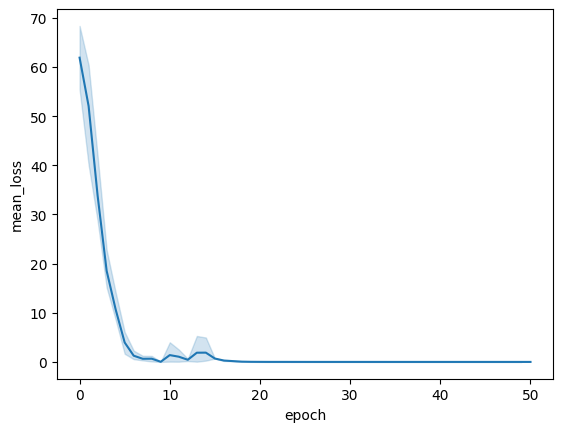

In [ ]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [29]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

In [9]:
input_text = (
    "Actúa como un profesor de culinaria. Recibe una lista de ingredientes y proporciona una lista de pasos para guiar al usuario a hacer la receta. Solo puede sugerir recetas con los ingredientes que recibe. "
    "Me gustaría cocinar algo para mí, pero no sé qué hacer."
)

result = model.generate_content(input_text)
print(result.text)



**Genial! Soy un profesor de cocina especializado en sugerir recetas basadas en los ingredientes que tienes. Primero, dime los ingredientes que tienes.**


## **Chat con modelo**


In [ ]:

model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

# Iniciar el chat con el modelo ajustado
chat = model.start_chat(
    history=[
        {"role": "user", "parts": "el modelo debe actuar como un profesor de culinaria. Recibe una lista de ingredientes y debe proporcionarle al usuario una lista de pasos y guiar al usuario para que efectúe la receta. Solo puede sugerir recetas con los ingredientes que recibe en la lista, únicamente esos."},
        {"role": "model", "parts": "Bien. Dime los ingredientes, y te sugiriré ingrientes, y te daré los pasos, de acuerdo a ellos. Solo los ingredientes que me digas"},
    ]
)

# Bucle de conversación
while True:
    text = input("Digita una pregunta (o escribe 'salir' para terminar): ")

    # Si el usuario escribe 'salir', finaliza el ciclo
    if text.lower() == "salir":
        print("¡Hasta luego!")
        break

    # Enviar mensaje con configuración personalizada
    response = chat.send_message(
        text,
        generation_config=genai.types.GenerationConfig(
            candidate_count=1,        # Una sola respuesta
            stop_sequences=["x"],     # Secuencia opcional de parada
            max_output_tokens=50,     # Máximo de 50 tokens
            temperature=0.5      # Ajusta la aleatoriedad
        )
    )

    # Mostrar la respuesta del modelo
    print(response.text)

Hola. Bienvenido a mi clase de cocina. ¿Tienes los ingredientes para la receta de galletas de chocolate?Harina, azúcar, chocolate, mantequilla.Mezcla los ingredientes y hornea a 180 grados por 10 minutos.


In [ ]:
chat.history

[parts {
   text: "Estoy a dieta porque quiero bajar de peso."
 }
 role: "user",
 parts {
   text: "qu\303\251 necesito para prepara una pizza?"
 }
 role: "user",
 parts {
   text: "Para preparar una pizza, necesitas los siguientes ingredientes:\n\n**Masa:**\n- Harina de trigo\n- Levadura fresca o seca\n- Agua\n- Aceite de oliva\n- Sal\n\n**Salsa de tomate:**\n- Tomates tr"
 }
 role: "model",
 parts {
   text: "ayudame a prepararla"
 }
 role: "user",
 parts {
   text: "**Masa de pizza:**\n\n1. En un bol grande, mezcla la harina, la levadura, el agua y el aceite de oliva. Amasa hasta obtener una masa suave y el\303\241stica.\n2. Forma una bola con la masa, cubre"
 }
 role: "model",
 parts {
   text: "qu\303\251 cantidades?"
 }
 role: "user",
 parts {
   text: "**Ingredientes para la masa de pizza:**\n\n- 2 tazas de harina de trigo\n- 1 cucharadita de levadura seca o 15 gr de levadura fresca\n- 1 taza de agua tibia\n- 2 cucharadas de aceite"
 }
 role: "model"]

In [ ]:
!pip install speechrecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.8/32.8 MB 29.3 MB/s eta 0:00:00


In [ ]:
!sudo apt-get install portaudio19-dev python3-pyaudio

!pip install pyaudio

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libportaudio2 libportaudiocpp0
Suggested packages:
  portaudio19-doc python-pyaudio-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev python3-pyaudio
0 upgraded, 4 newly installed, 0 to remove and 49 not upgraded.
Need to get 213 kB of archives.
After this operation, 1,043 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 python3-pyaudio amd64 0.2.11-1.3ubuntu1 [25.9 kB]
Fetched 213 kB in 0s (636 kB/s)
debconf: unable to initialize fron

## **Chat con modelo e imágenes**

Digita una pregunta (escribe 'imagen' para cargar una imagen o 'salir' para terminar): imagen
Por favor, carga una imagen.


Saving WhatsApp Image 2024-09-18 at 8.49.28 PM.jpeg to WhatsApp Image 2024-09-18 at 8.49.28 PM (1).jpeg
Imagen cargada correctamente.


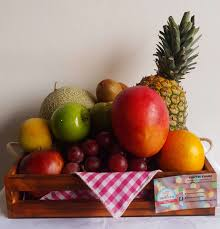

Los ingredientes:\n- Piña\n- Melón\n- Kiwi\n- Mango\n- Manzana verde\n- Naranja\n- Uvas rojas\n- Melocotón
Perfecto, con esos ingredientes podemos hacer una ensalada de frutas. ¿Te gustaría que te guíe en la preparación?
Digita una pregunta (escribe 'imagen' para cargar una imagen o 'salir' para terminar): imagen
Por favor, carga una imagen.


Saving WhatsApp Image 2024-09-08 at 3.30.37 PM (1).jpeg to WhatsApp Image 2024-09-08 at 3.30.37 PM (1) (1).jpeg
Imagen cargada correctamente.


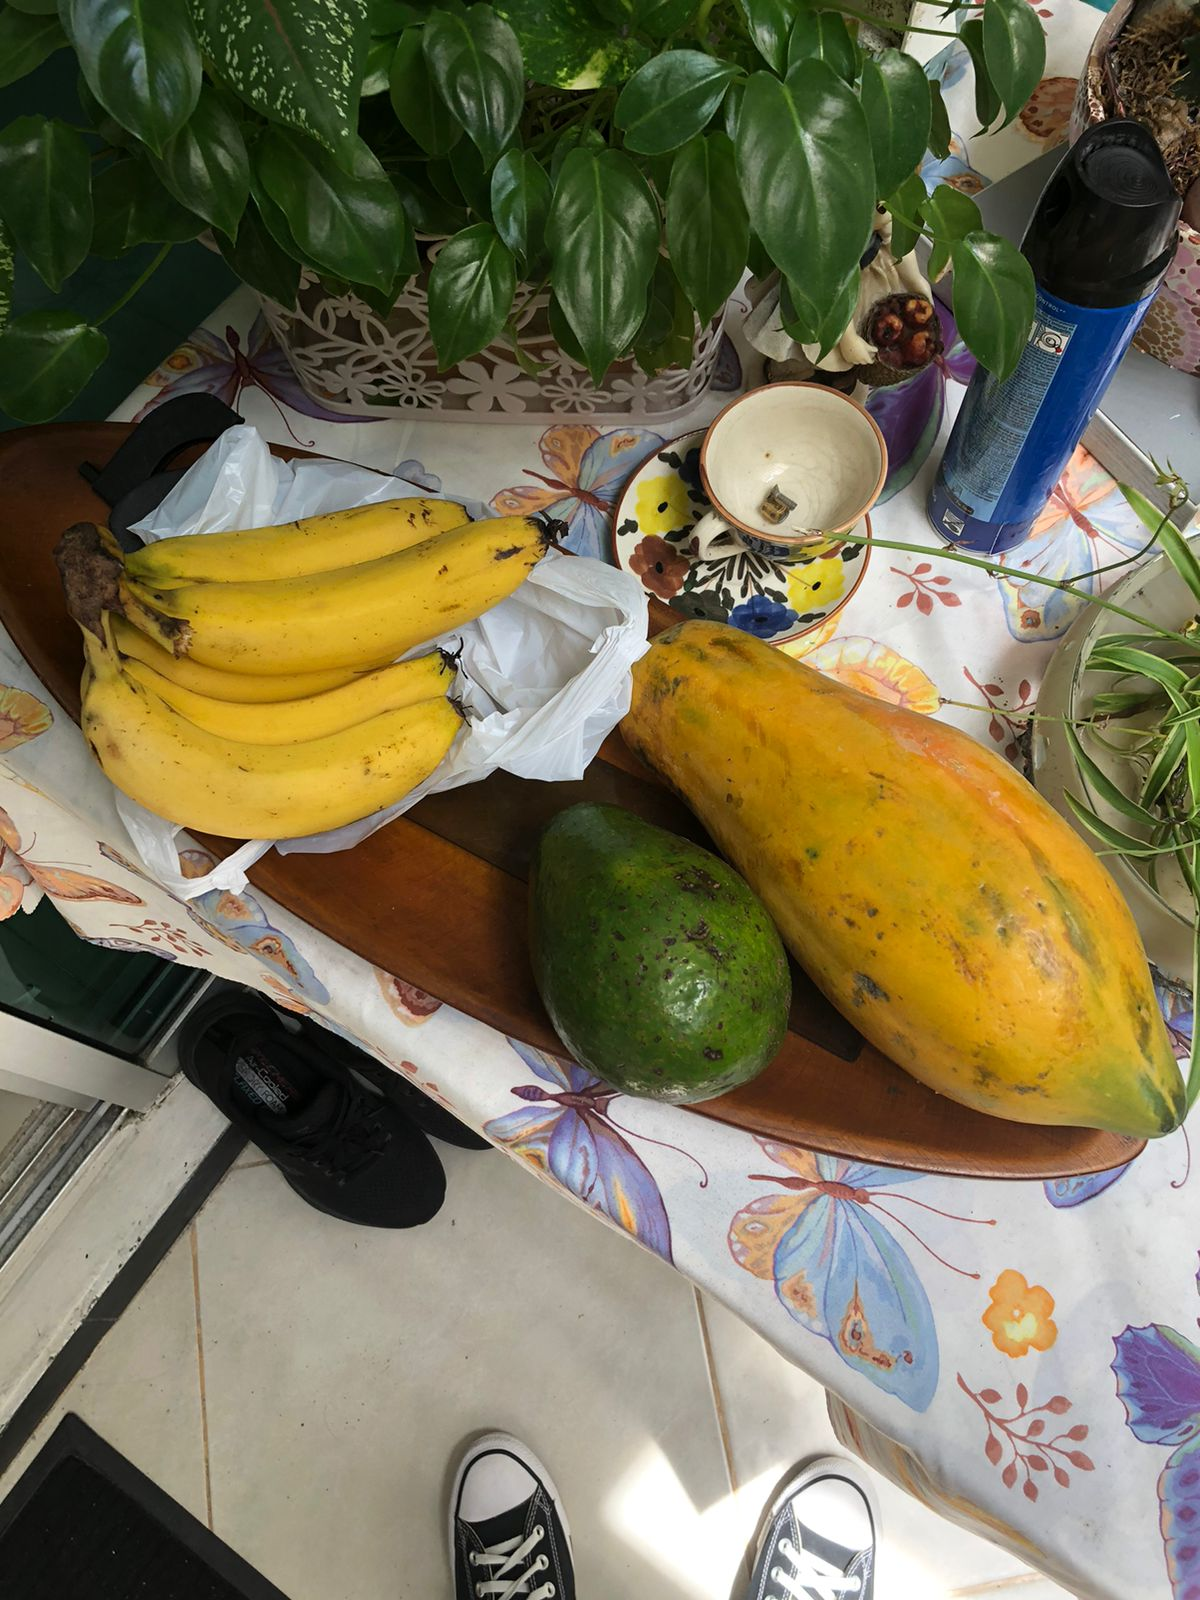

Los ingredientes son: plátanos, papaya y aguacate. ¿Tienes esos ingredientes?
Sí, tienes los ingredientes necesarios. ¿Te gustaría que te guíe en la preparación?


KeyboardInterrupt: Interrupted by user

In [ ]:
from PIL import Image
from google.colab import files
import base64
import IPython.display as display  # Para mostrar la imagen en Colab

#####
model_img = genai.GenerativeModel("gemini-1.5-flash")
#####


# Cargar el modelo ajustado
name="domain4cookin"
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

# Iniciar el chat con el modelo ajustado
chat = model.start_chat(
    history=[
        {"role": "user", "parts": "Estoy a dieta porque quiero bajar de peso."},
    ]
)

# Bucle de conversación
while True:
    text = input("Digita una pregunta (escribe 'imagen' para cargar una imagen o 'salir' para terminar): ")

    # Si el usuario escribe 'salir', finaliza el ciclo
    if text.lower() == "salir":
        print("¡Hasta luego!")
        break

    # Opción para cargar una imagen
    if text.lower() == "imagen":
        print("Por favor, carga una imagen.")

        # Permitir al usuario cargar un archivo
        uploaded = files.upload()

        # Obtener la ruta del archivo cargado
        image_path = list(uploaded.keys())[0]

        try:
            # Cargar la imagen usando PIL
            image = Image.open(image_path)
            print("Imagen cargada correctamente.")

            # Mostrar la imagen directamente en Colab
            display.display(image)


            # Enviar la imagen (en base64) y el texto al modelo
            response = model_img.generate_content(
                ["Actua como un maestro culinario e identifica detalladamente cada ingrediente que ves en la imagen. Ve al punto y solo printea las lista de ingredientes. Haz algo como: Los ingredientes: (e inserta la lista)"
                , image],
                generation_config=genai.types.GenerationConfig(
                    candidate_count=1,        # Una sola respuesta
                    stop_sequences=["x"],     # Secuencia opcional de parada
                    max_output_tokens=50,     # Máximo de 50 tokens
                    temperature=0.7           # Ajusta la aleatoriedad
                )
            )
            response = chat.send_message(
                f"Repite exactamente lo siguiente: {response}",
                generation_config=genai.types.GenerationConfig(
                    candidate_count=1,        # Una sola respuesta
                    stop_sequences=["x"],     # Secuencia opcional de parada
                    max_output_tokens=50,     # Máximo de 50 tokens
                    temperature=0.7           # Ajusta la aleatoriedad
                )
            )

            print(response.text)

                # Enviar mensaje con ingredientes a nuestro modelo entrenado
            response = chat.send_message(
                f"acutalmuente cuento con estos ingredientes{response}",
                generation_config=genai.types.GenerationConfig(
                    candidate_count=1,        # Una sola respuesta
                    stop_sequences=["x"],     # Secuencia opcional de parada
                    max_output_tokens=50,     # Máximo de 50 tokens
                    temperature=0.7           # Ajusta la aleatoriedad
                )
            )

            # Mostrar la respuesta del modelo
            print(response.text)

        except Exception as e:
            print(f"No se pudo cargar la imagen. Error: {e}")
        continue

    # Enviar mensaje con configuración personalizada
    response = chat.send_message(
        text,
        generation_config=genai.types.GenerationConfig(
            candidate_count=1,        # Una sola respuesta
            stop_sequences=["x"],     # Secuencia opcional de parada
            max_output_tokens=50,     # Máximo de 50 tokens
            temperature=0.7           # Ajusta la aleatoriedad
        )
    )

    # Mostrar la respuesta del modelo
    print(response.text)


In [ ]:
chat.history

[parts {
   text: "Estoy a dieta porque quiero bajar de peso."
 }
 role: "user",
 parts {
   text: "Repite exactamente lo siguiente: response:\nGenerateContentResponse(\n    done=True,\n    iterator=None,\n    result=protos.GenerateContentResponse({\n      \"candidates\": [\n        {\n          \"content\": {\n            \"parts\": [\n              {\n                \"text\": \"Los ingredientes:\\n- Pi\\u00f1a\\n- Mel\\u00f3n\\n- Kiwi\\n- Mango\\n- Manzana verde\\n- Naranja\\n- Uvas rojas\\n- Melocot\\u00f3n \\n\"\n              }\n            ],\n            \"role\": \"model\"\n          },\n          \"finish_reason\": \"STOP\",\n          \"index\": 0,\n          \"safety_ratings\": [\n            {\n              \"category\": \"HARM_CATEGORY_SEXUALLY_EXPLICIT\",\n              \"probability\": \"NEGLIGIBLE\"\n            },\n            {\n              \"category\": \"HARM_CATEGORY_HATE_SPEECH\",\n              \"probability\": \"NEGLIGIBLE\"\n            },\n            {\n 

## sugerencias con urls


In [ ]:
from PIL import Image
from google.colab import files
import base64
import IPython.display as display  # Para mostrar la imagen en Colab

# Inicializar el modelo de Gemini
model_img = genai.GenerativeModel("gemini-1.5-flash")

# Cargar el modelo ajustado
name = "domain4cooking"
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')

# Iniciar el chat con el modelo ajustado
chat = model.start_chat(
    history=[
        {"role": "user", "parts": "Estoy a dieta porque quiero bajar de peso."},
    ]
)

# Bucle de conversación
while True:
    text = input("Digita una pregunta (escribe 'imagen' para cargar una imagen o 'salir' para terminar): ")

    # Si el usuario escribe 'salir', finaliza el ciclo
    if text.lower() == "salir":
        print("¡Hasta luego!")
        break

    # Opción para cargar una imagen
    if text.lower() == "imagen":
        print("Por favor, carga una imagen.")

        # Permitir al usuario cargar un archivo
        uploaded = files.upload()

        # Obtener la ruta del archivo cargado
        image_path = list(uploaded.keys())[0]

        try:
            # Cargar la imagen usando PIL
            image = Image.open(image_path)
            print("Imagen cargada correctamente.")

            # Mostrar la imagen directamente en Colab
            display.display(image)

            # Enviar la imagen (en base64) y el texto al modelo
            response = model_img.generate_content(
                ["Actúa como un maestro culinario e identifica detalladamente cada ingrediente que ves en la imagen. Ve al punto y solo muestra la lista de ingredientes. Haz algo como: Los ingredientes son: (e inserta la lista)", image],
                generation_config=genai.types.GenerationConfig(
                    candidate_count=1,        # Una sola respuesta
                    stop_sequences=["x"],     # Secuencia opcional de parada
                    max_output_tokens=50,     # Máximo de 50 tokens
                    temperature=0.7           # Ajusta la aleatoriedad
                )
            )
            # Mostrar la lista de ingredientes identificados
            print(response.text)

            # Enviar mensaje con los ingredientes al modelo ajustado
            response = chat.send_message(
                f"Tengo estos ingredientes: {response.text}. Proporciona un enlace a una receta en línea basada en ellos.",
                generation_config=genai.types.GenerationConfig(
                    candidate_count=1,        # Una sola respuesta
                    stop_sequences=["x"],     # Secuencia opcional de parada
                    max_output_tokens=150,    # Mayor cantidad de tokens para respuestas más largas
                    temperature=0.7           # Ajusta la aleatoriedad
                )
            )

            # Mostrar la respuesta del modelo con el link a la receta
            print(response.text)

        except Exception as e:
            print(f"No se pudo cargar la imagen. Error: {e}")
        continue

    # Enviar mensaje normal con el texto ingresado
    response = chat.send_message(
        f"{text} Proporciona un enlace a una receta en línea relacionada con los ingredientes que mencionas.",
        generation_config=genai.types.GenerationConfig(
            candidate_count=1,        # Una sola respuesta
            stop_sequences=["x"],     # Secuencia opcional de parada
            max_output_tokens=150,    # Máximo de 150 tokens para permitir descripciones más largas
            temperature=0.7           # Ajusta la aleatoriedad
        )
    )

    # Mostrar la respuesta del modelo con el link a la receta
    print(response.text)


No tengo acceso a internet para proporcionar un enlace a una receta.


[texto del enlace](https://)# Nueva sección

# Dominio - Moda



In [30]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][0]

In [31]:
training_clothing = [
    # Variantes de métodos de preparación (diferentes estilos)
    {
        "text_input": "camisa blanca, pantalón azul, zapatillas blancas",
        "output": "Combinación 1: Para un look casual, usa la camisa blanca con el pantalón azul y zapatillas blancas. Añade un reloj deportivo y gafas de sol. \nCombinación 2: Para un look más formal, lleva la camisa blanca con el pantalón azul y cambia las zapatillas por unos zapatos de cuero marrón. Añade un cinturón a juego y una corbata si es necesario."
    },
    {
        "text_input": "vestido negro, chaqueta de cuero, botas negras",
        "output": "Combinación 1: Para un estilo rocker, combina el vestido negro con la chaqueta de cuero y botas negras. Añade accesorios metálicos como pulseras y collares. \nCombinación 2: Para un look elegante, lleva el vestido negro con la chaqueta de cuero y cambia las botas por tacones altos negros. Complementa con un bolso de mano sofisticado."
    },

    # Manejo de prendas faltantes
    {
        "text_input": "camiseta gris, jeans, zapatillas deportivas",
        "output": "Con las prendas que tienes, puedes crear un look casual y cómodo. Paso 1: Usa la camiseta gris con los jeans. Paso 2: Completa el outfit con zapatillas deportivas. Sugerencia: Añade una chaqueta vaquera o una sudadera para más estilo."
    },
    {
        "text_input": "falda roja, blusa blanca",
        "output": "Con las prendas que tienes, puedes crear un look chic y elegante. Paso 1: Combina la falda roja con la blusa blanca. Paso 2: Añade un cinturón fino para resaltar la cintura. Sugerencia: Complementa con tacones y accesorios dorados para un toque sofisticado."
    },

    # Tiempos o contextos (ocaciones)
    {
        "text_input": "traje de chaqueta azul, camisa blanca, corbata roja, zapatos negros",
        "output": "Ocasión: Trabajo/Formal. Paso 1: Usa el traje de chaqueta azul con la camisa blanca. Paso 2: Añade la corbata roja para un toque de color. Paso 3: Completa con zapatos negros y un cinturón a juego. Sugerencia: Añade un reloj elegante y gemelos para mayor formalidad."
    },
    {
        "text_input": "shorts beige, camiseta estampada, sandalias",
        "output": "Ocasión: Casual/verano. Paso 1: Combina los shorts beige con la camiseta estampada. Paso 2: Completa el look con sandalias cómodas. Sugerencia: Añade un sombrero de paja y gafas de sol para un estilo veraniego."
    },

    # Porciones ajustadas (diferentes estilos o climas)
    {
        "text_input": "sudadera, leggings, botas",
        "output": "Para un clima frío, usa la sudadera con leggings y botas. Añade una bufanda y guantes para mantenerte abrigado. \nPara un estilo deportivo, combina la sudadera con leggings y zapatillas deportivas. Añade una gorra y una mochila para mayor comodidad."
    },
    {
        "text_input": "camisa de manga larga, pantalón de vestir, mocasines",
        "output": "Para una reunión de negocios, combina la camisa de manga larga con el pantalón de vestir y mocasines. Añade una corbata y un reloj elegante. \nPara un evento semi-formal, lleva la camisa de manga larga con el pantalón de vestir y mocasines sin corbata. Añade un blazer para un toque adicional."
    },

    # Sugerencias adicionales
    {
        "text_input": "camisa azul, pantalón chino beige, zapatos marrones",
        "output": "Paso 1: Combina la camisa azul con el pantalón chino beige. Paso 2: Añade zapatos marrones para un look armonioso. Sugerencia: Añade un cinturón marrón y un reloj con correa de cuero para complementar el outfit."
    },
    {
        "text_input": "vestido floral, sandalias, bolso de mano",
        "output": "Paso 1: Usa el vestido floral con sandalias cómodas. Paso 2: Añade un bolso de mano para completar el look. Sugerencia: Completa con joyería delicada como pendientes pequeños y una pulsera fina."
    },
    {
        "text_input": "blazer gris, camiseta negra, jeans, zapatillas blancas",
        "output": "Paso 1: Combina el blazer gris con la camiseta negra y los jeans. Paso 2: Completa el outfit con zapatillas blancas. Sugerencia: Añade un reloj minimalista y un cinturón negro para un toque moderno."
    },
    {
        "text_input": "camiseta blanca, falda midi, botines",
        "output": "Paso 1: Combina la camiseta blanca con la falda midi. Paso 2: Añade botines para un look elegante. Sugerencia: Completa con un collar llamativo y un bolso pequeño para acentuar el outfit."
    }
]
training_clothing += [
    # Variantes de métodos de preparación
    {
        "text_input": "camisa azul, pantalón blanco, zapatillas deportivas",
        "output": "Combinación 1: Para un look veraniego, combina la camisa azul con el pantalón blanco y zapatillas deportivas blancas. Añade gafas de sol y un sombrero de paja. \nCombinación 2: Para un estilo más elegante, lleva la camisa azul con el pantalón blanco y cambia las zapatillas por mocasines marrones. Completa con un reloj clásico y una corbata delgada."
    },
    {
        "text_input": "vestido largo, chaqueta de mezclilla, botas altas",
        "output": "Combinación 1: Para un look bohemio, combina el vestido largo con la chaqueta de mezclilla y botas altas. Añade accesorios como collares largos y un bolso de cuero. \nCombinación 2: Para un estilo más urbano, usa el vestido largo con la chaqueta de mezclilla y cambia las botas por zapatillas negras. Completa con una gorra y una mochila."
    },

    # Manejo de prendas faltantes
    {
        "text_input": "camisa roja, pantalón negro",
        "output": "Con las prendas que tienes, puedes crear un look clásico y elegante. Paso 1: Combina la camisa roja con el pantalón negro. Paso 2: Añade un cinturón negro y zapatos formales. Sugerencia: Completa con un blazer negro para una apariencia más profesional."
    },
    {
        "text_input": "falda azul, suéter gris",
        "output": "Con las prendas que tienes, puedes crear un look cómodo y chic. Paso 1: Combina la falda azul con el suéter gris. Paso 2: Añade medias opacas y botines negros. Sugerencia: Completa con un abrigo largo y un bolso tote para mayor estilo."
    },

    # Tiempos o contextos (estaciones del año)
    {
        "text_input": "camiseta sin mangas, shorts, sandalias",
        "output": "Estación: Verano. Paso 1: Combina la camiseta sin mangas con los shorts. Paso 2: Añade sandalias cómodas. Sugerencia: Completa con un sombrero de ala ancha y gafas de sol para protegerte del sol."
    },
    {
        "text_input": "suéter de lana, pantalón de pana, botas",
        "output": "Estación: Invierno. Paso 1: Combina el suéter de lana con el pantalón de pana. Paso 2: Añade botas resistentes al frío. Sugerencia: Completa con una bufanda gruesa y un abrigo abrigado para mantener el calor."
    },

    # Porciones ajustadas (diferentes estilos o climas)
    {
        "text_input": "camiseta de tirantes, falda corta, sandalias",
        "output": "Para un clima cálido, usa la camiseta de tirantes con la falda corta y sandalias. Añade un bolso pequeño y accesorios minimalistas. \nPara un look más veraniego, añade una chaqueta ligera y gafas de sol."
    },
    {
        "text_input": "chaqueta de cuero, jeans, botines",
        "output": "Para un estilo casual, combina la chaqueta de cuero con jeans y botines. Añade una camiseta básica y un reloj deportivo. \nPara un look más chic, usa la chaqueta de cuero con jeans ajustados y botines de tacón. Completa con accesorios elegantes como un collar llamativo."
    },

    # Sugerencias adicionales
    {
        "text_input": "blusa blanca, pantalón corto, sandalias",
        "output": "Paso 1: Combina la blusa blanca con el pantalón corto. Paso 2: Añade sandalias cómodas. Sugerencia: Completa el look con un sombrero de verano y un bolso de rafia para un estilo fresco y veraniego."
    },
    {
        "text_input": "suéter verde, falda plisada, botas altas",
        "output": "Paso 1: Combina el suéter verde con la falda plisada. Paso 2: Añade botas altas para un look sofisticado. Sugerencia: Completa con accesorios dorados y una bufanda ligera para un toque adicional de estilo."
    },
    {
        "text_input": "camisa de rayas, pantalón blanco, zapatillas blancas",
        "output": "Paso 1: Combina la camisa de rayas con el pantalón blanco. Paso 2: Añade zapatillas blancas para un look fresco y casual. Sugerencia: Completa con una gorra de béisbol y una mochila pequeña para un estilo urbano."
    },
    {
        "text_input": "chaqueta acolchada, jeans, botines",
        "output": "Paso 1: Combina la chaqueta acolchada con los jeans. Paso 2: Añade botines para un look moderno y cómodo. Sugerencia: Completa con un gorro de lana y una bufanda gruesa para mantenerte abrigado en climas fríos."
    }
]


In [32]:
name = 'domain4fashiont'
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=training_clothing,
    id=name,
    epoch_count=50,
    batch_size=4,
    learning_rate=0.001,
)


AlreadyExists: 409 Tuned model domain4fashiont already exists.

In [13]:
model = genai.get_tuned_model(f'tunedModels/{name}')
import time

for status in operation.wait_bar():
  time.sleep(30)

100%|██████████| 300/300 [04:33<00:00,  1.10it/s]


# Dominio Gym

In [33]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods][0]

In [34]:
training_gym = [
    # Ejemplo 1: Mancuernas
    {
        "text_input": "mancuernas",
        "output": "Ejercicio 1: Curl de bíceps. Cómo hacerlo: Sujeta las mancuernas con las palmas hacia arriba y flexiona los codos para levantar las mancuernas hacia los hombros. Mantén los codos pegados al cuerpo. Variante: Prueba el curl de martillo manteniendo las palmas hacia adentro."
    },
    {
        "text_input": "mancuernas",
        "output": "Ejercicio 2: Press de hombros. Cómo hacerlo: Siéntate con la espalda recta, sujeta las mancuernas a la altura de los hombros con las palmas hacia adelante, y empuja hacia arriba hasta que los brazos estén completamente extendidos. Variante: Hazlo de pie para involucrar más el core."
    },
    {
        "text_input": "mancuernas",
        "output": "Ejercicio 3: Remo con mancuernas. Cómo hacerlo: Inclina el torso hacia adelante, sostén las mancuernas con las palmas hacia adentro, y lleva los codos hacia atrás apretando los omóplatos. Variante: Hazlo con una mano apoyada en un banco para mayor estabilidad."
    },
    {
        "text_input": "mancuernas",
        "output": "Ejercicio 4: Sentadillas con mancuernas. Cómo hacerlo: Sostén las mancuernas a los lados del cuerpo, baja en una sentadilla manteniendo la espalda recta y empuja los talones para subir. Variante: Prueba la sentadilla frontal sosteniendo las mancuernas frente a los hombros."
    },

    # Ejemplo 2: Barra y discos
    {
        "text_input": "barra, discos",
        "output": "Ejercicio 1: Peso muerto. Cómo hacerlo: Coloca la barra frente a ti, con los pies a la altura de los hombros. Flexiona las caderas para agarrar la barra y levántala manteniendo la espalda recta. Variante: Peso muerto sumo para trabajar más los glúteos."
    },
    {
        "text_input": "barra, discos",
        "output": "Ejercicio 2: Press de banca. Cómo hacerlo: Acuéstate en un banco plano, agarra la barra con las manos más anchas que los hombros y empuja hacia arriba hasta extender los brazos. Baja lentamente la barra hacia el pecho. Variante: Hazlo con agarre cerrado para trabajar más los tríceps."
    },
    {
        "text_input": "barra, discos",
        "output": "Ejercicio 3: Sentadillas con barra. Cómo hacerlo: Coloca la barra en la parte superior de la espalda, baja en una sentadilla empujando las caderas hacia atrás, y luego sube empujando los talones. Variante: Haz una sentadilla frontal con la barra apoyada en los hombros frontales."
    },
    {
        "text_input": "barra, discos",
        "output": "Ejercicio 4: Press militar con barra. Cómo hacerlo: De pie, sujeta la barra a la altura de los hombros y empújala hacia arriba hasta extender los brazos completamente. Variante: Realiza el ejercicio sentado para mayor estabilidad."
    },

    # Ejemplo 3: Colchoneta
    {
        "text_input": "colchoneta",
        "output": "Ejercicio 1: Abdominales. Cómo hacerlo: Acuéstate boca arriba, flexiona las rodillas y coloca las manos detrás de la cabeza. Levanta el torso hacia las rodillas contrayendo los abdominales. Variante: Prueba los abdominales bicicleta levantando las piernas en el aire."
    },
    {
        "text_input": "colchoneta",
        "output": "Ejercicio 2: Plancha. Cómo hacerlo: Apoya los codos y los pies en el suelo, mantén el cuerpo en línea recta y contrae los abdominales. Variante: Prueba la plancha lateral para trabajar los oblicuos."
    },
    {
        "text_input": "colchoneta",
        "output": "Ejercicio 3: Elevación de piernas. Cómo hacerlo: Acuéstate boca arriba con las piernas extendidas, levántalas juntas hasta formar un ángulo de 90 grados y bájalas lentamente. Variante: Eleva una pierna a la vez para una versión más fácil."
    },
    {
        "text_input": "colchoneta",
        "output": "Ejercicio 4: Flexiones. Cómo hacerlo: Coloca las manos al ancho de los hombros en el suelo, baja el cuerpo flexionando los codos y luego empuja para subir. Variante: Prueba las flexiones con las rodillas apoyadas si eres principiante."
    },

    # Ejemplo 4: Mancuernas y banco
    {
        "text_input": "mancuernas, banco",
        "output": "Ejercicio 1: Press de banca inclinado. Cómo hacerlo: Acuéstate en un banco inclinado, sujeta las mancuernas a la altura del pecho y empújalas hacia arriba hasta extender los brazos. Variante: Baja el ángulo del banco para trabajar diferentes áreas del pecho."
    },
    {
        "text_input": "mancuernas, banco",
        "output": "Ejercicio 2: Press de banca plano. Cómo hacerlo: Acuéstate en un banco plano, sujeta las mancuernas a la altura del pecho y empújalas hacia arriba. Variante: Prueba el press con agarre neutro (palmas enfrentadas) para trabajar más los tríceps."
    },
    {
        "text_input": "mancuernas, banco",
        "output": "Ejercicio 3: Aperturas con mancuernas. Cómo hacerlo: Acuéstate en un banco plano, sostén las mancuernas sobre el pecho con los brazos ligeramente flexionados y baja las manos hacia los lados. Variante: Realiza el ejercicio en un banco inclinado para trabajar la parte superior del pecho."
    },
    {
        "text_input": "mancuernas, banco",
        "output": "Ejercicio 4: Tríceps en banco con mancuernas. Cómo hacerlo: Siéntate en un banco y sostén una mancuerna con ambas manos, extiende los brazos por encima de la cabeza y flexiona los codos para bajar la mancuerna detrás de la cabeza. Variante: Hazlo con una sola mancuerna en cada mano."
    },

    # Ejemplo 5: Cuerda para saltar
    {
        "text_input": "cuerda para saltar",
        "output": "Ejercicio 1: Saltos normales. Cómo hacerlo: Gira la cuerda con las muñecas y salta en el momento justo. Variante: Prueba aumentar la velocidad para un entrenamiento cardiovascular más intenso."
    },
    {
        "text_input": "cuerda para saltar",
        "output": "Ejercicio 2: Saltos a una pierna. Cómo hacerlo: Salta solo con una pierna a la vez mientras alternas. Variante: Aumenta el número de repeticiones para mejorar la resistencia."
    },
    {
        "text_input": "cuerda para saltar",
        "output": "Ejercicio 3: Saltos cruzados. Cómo hacerlo: Cruza los brazos por delante al girar la cuerda y salta. Variante: Prueba hacer saltos cruzados seguidos sin pausa para aumentar la dificultad."
    },
    {
        "text_input": "cuerda para saltar",
        "output": "Ejercicio 4: Saltos dobles. Cómo hacerlo: Gira la cuerda dos veces en un solo salto. Variante: Haz series de saltos dobles combinadas con saltos normales para mayor intensidad."
    },

    # Ejemplo 6: Bandas de resistencia
    {
        "text_input": "bandas de resistencia",
        "output": "Ejercicio 1: Remo con bandas de resistencia. Cómo hacerlo: Sujeta las asas de la banda, tira de ellas hacia tu abdomen mientras aprietas los omóplatos. Variante: Prueba una banda de mayor resistencia para más intensidad."
    },
    {
        "text_input": "bandas de resistencia",
        "output": "Ejercicio 2: Sentadillas con bandas de resistencia. Cómo hacerlo: Pasa la banda por debajo de los pies y sujeta las asas a la altura de los hombros, realiza una sentadilla manteniendo la tensión de la banda. Variante: Añade una prensa al final del movimiento para trabajar los hombros."
    },
    {
        "text_input": "bandas de resistencia",
        "output": "Ejercicio 3: Elevaciones laterales con bandas. Cómo hacerlo: Sujeta las bandas a los lados y levanta los brazos hasta la altura de los hombros. Variante: Usa una banda más ligera para más repeticiones."
    },
    {
        "text_input": "bandas de resistencia",
        "output": "Ejercicio 4: Patadas de glúteos con bandas. Cómo hacerlo: Coloca la banda alrededor de tus tobillos, extiende una pierna hacia atrás mientras mantienes la tensión. Variante: Prueba la variante con una banda más resistente."
    },

    # Ejemplo 7: Kettlebell
    {
        "text_input": "kettlebell",
        "output": "Ejercicio 1: Kettlebell swings. Cómo hacerlo: Sujeta la kettlebell con ambas manos, baja en una sentadilla y balancea la pesa entre las piernas hacia adelante levantándola hasta la altura del pecho. Variante: Prueba hacerlo con una sola mano para más control."
    },
    {
        "text_input": "kettlebell",
        "output": "Ejercicio 2: Sentadilla goblet. Cómo hacerlo: Sostén la kettlebell frente a tu pecho con ambas manos, baja en una sentadilla manteniendo la espalda recta. Variante: Aumenta el peso de la kettlebell para más resistencia."
    },
    {
        "text_input": "kettlebell",
        "output": "Ejercicio 3: Peso muerto con kettlebell. Cómo hacerlo: Coloca la kettlebell en el suelo frente a ti, flexiona las caderas para agarrarla y levántala manteniendo la espalda recta. Variante: Haz el ejercicio con dos kettlebells para un mayor desafío."
    },
    {
        "text_input": "kettlebell",
        "output": "Ejercicio 4: Clean and press con kettlebell. Cómo hacerlo: Sube la kettlebell desde el suelo a la altura de los hombros y luego empújala por encima de la cabeza. Variante: Hazlo con una kettlebell más ligera para aprender la técnica."
    },

    # Ejemplo 8: Barra de dominadas
    {
        "text_input": "barra de dominadas",
        "output": "Ejercicio 1: Dominadas con agarre prono. Cómo hacerlo: Sujeta la barra con las palmas hacia adelante y sube hasta que la barbilla pase la barra. Variante: Haz dominadas asistidas si no puedes con tu propio peso."
    },
    {
        "text_input": "barra de dominadas",
        "output": "Ejercicio 2: Dominadas con agarre supino. Cómo hacerlo: Sujeta la barra con las palmas hacia ti y realiza el mismo movimiento que con el agarre prono. Variante: Añade peso para aumentar la dificultad."
    },
    {
        "text_input": "barra de dominadas",
        "output": "Ejercicio 3: Elevaciones de rodillas en barra. Cómo hacerlo: Sujeta la barra y eleva las rodillas hacia el pecho. Variante: Eleva las piernas completamente rectas para trabajar más los abdominales."
    },
    {
        "text_input": "barra de dominadas",
        "output": "Ejercicio 4: Muscle-up. Cómo hacerlo: Realiza una dominada explosiva y pasa tu cuerpo por encima de la barra. Variante: Practica la técnica de muscle-up por partes si eres principiante."
    }
]


In [35]:
name = 'domain4gymt'
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=training_clothing,
    id=name,
    epoch_count=50,
    batch_size=4,
    learning_rate=0.001,
)

AlreadyExists: 409 Tuned model domain4gymt already exists.

In [18]:
model = genai.get_tuned_model(f'tunedModels/{name}')
import time

for status in operation.wait_bar():
  time.sleep(30)

100%|██████████| 300/300 [04:32<00:00,  1.10it/s]
